In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
from pandas_datareader import data as wb
import yfinance as yf

/tmp/ipykernel_257/1662011929.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# yfinance irá substituir as funções do pandas-datareader que estão com bugs
# funções que funcionam corretamente
yf.pdr_override()

In [5]:
tickers = ['BTC-USD', 'IMX10603-USD', 'DOT-USD', 'ADA-USD', 'RNDR-USD', 'INJ-USD', 'ETH-USD', 'RLB-USD']
start = '2023-3-1'
end = '2024-2-12'
tickers = pdr.get_data_yahoo(tickers, start, end)['Adj Close']
tickers = tickers.dropna()
tickers


/var/data/python/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/var/data/python/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[                       0%%                      ]/var/data/python/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[******************    38%%                      ]  3 of 8 completed/var/data/python/lib/python3.11/site-packages/yfinance/utils.py

Ticker,ADA-USD,BTC-USD,DOT-USD,ETH-USD,IMX10603-USD,INJ-USD,RLB-USD,RNDR-USD
Date,,,,,,,,
2023-03-01,0.360356,23646.550781,6.534181,1663.433716,1.061183,3.799483,0.028622,1.560085
2023-03-02,0.350206,23475.466797,6.326915,1647.319336,0.989381,3.739154,0.026007,1.527736
2023-03-03,0.342737,22362.679688,6.033932,1569.167603,1.025139,3.601231,0.031717,1.357035
2023-03-04,0.336499,22353.349609,5.912604,1566.923950,0.989588,3.259939,0.030667,1.238323
2023-03-05,0.337102,22435.513672,5.980068,1564.468750,1.049873,3.344785,0.037695,1.197647
...,...,...,...,...,...,...,...,...
2024-02-07,0.501773,44318.222656,6.939930,2423.745117,2.325302,32.933392,0.130713,4.464716
2024-02-08,0.529269,45301.566406,7.014666,2419.906494,2.277442,32.801998,0.126339,4.433060
2024-02-09,0.540792,47147.199219,7.191491,2487.515625,2.463652,34.854488,0.114556,4.705367


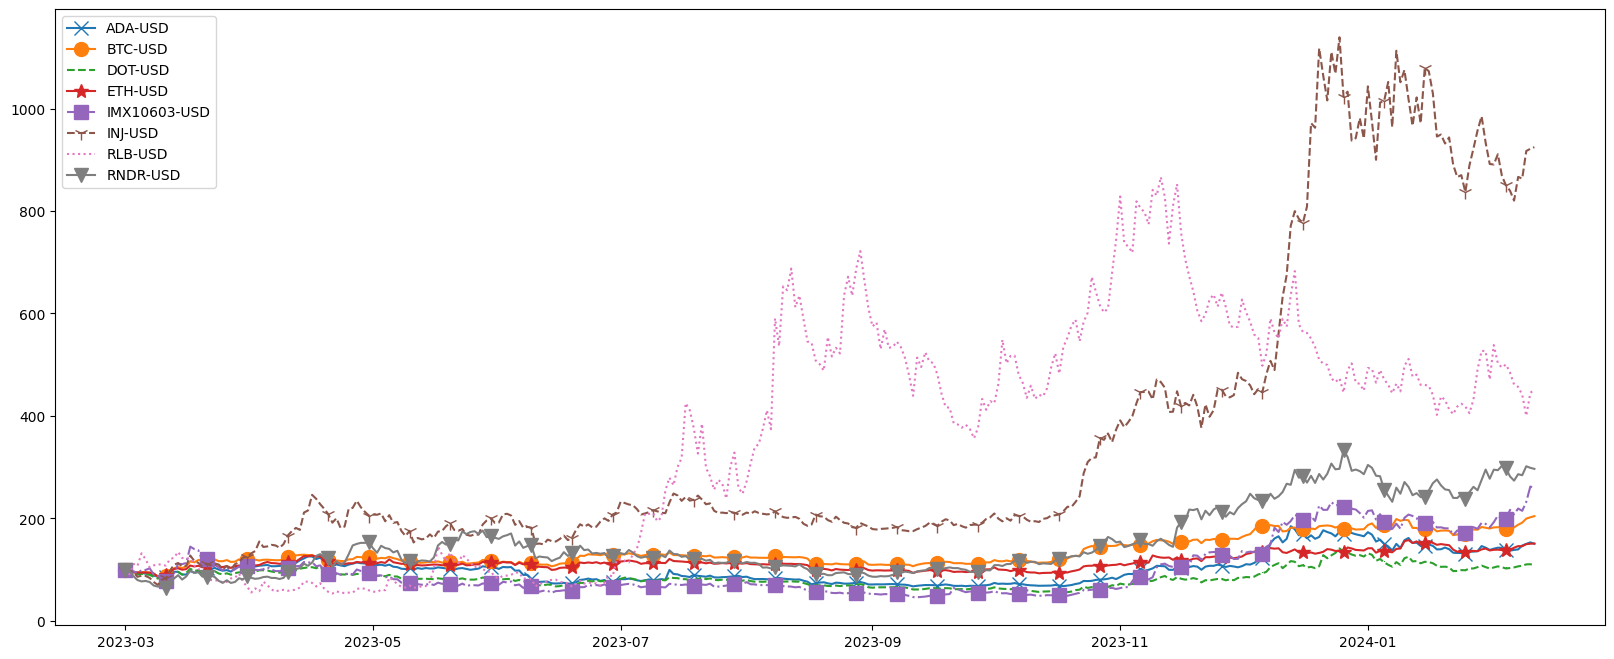

In [16]:
# normalize to BTC and plot wtih % changes
normalized_tickers = (tickers/tickers.iloc[0] * 100)

# create a figure and axis
fig, ax = plt.subplots(figsize = (20,8))

# Define a dictionary for line styles per ticker
# some tickers have markers
line_styles = {
    'BTC-USD': ('solid', 'o'),  # Solid line with circle marker
    'IMX10603-USD': ('dashdot', 's'),  
    'DOT-USD': ('dashed', ','),  
    'ADA-USD': ('solid', 'x'),
    'RNDR-USD': ('solid', 'v'),  
    'INJ-USD': ('dashed', '1'),  
    'ETH-USD': ('solid', '*'),  
    'RLB-USD': ('dotted', None)  
}

# Plot each ticker with a different line style and marker
for ticker, color in zip(normalized_tickers.columns, plt.rcParams['axes.prop_cycle'].by_key()['color']):
    style = line_styles.get(ticker, ('solid', None))  # Default to solid line with no marker
    ax.plot(normalized_tickers[ticker], label=ticker, color=color, linestyle=style[0], marker=style[1], markevery=10, markersize=10)

# Set the title
#ax.set_title('BTC vs alts', fontsize=20)

# Add a legend
ax.legend()

# Enable grid
#ax.grid(True)

# Show the plot
plt.show()